Caleb Sellinger: Exploratory Data Analysis Project

# Intro to Jupyter

Author: Caleb Sellinger

4 February 2025

Purpose: Module 4 project

## Section 1. Imports

In [214]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns

## Section 2. Load Data

In [215]:
df:pd.DataFrame = sns.load_dataset('iris')
# df.columns
# df.head()

## Section 3. Initial Data Inspection

Uncomment each line one at a time to see how they effect the data frame.

In [216]:
# df.columns
# df.head()
# df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Section 4. Initial Descriptive Statistics

The describe() method shows a statistical summary of the numerical columns in the data frame.

In [217]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Section 5. Initial Data Distribution for Numerical/Categorical Columns

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

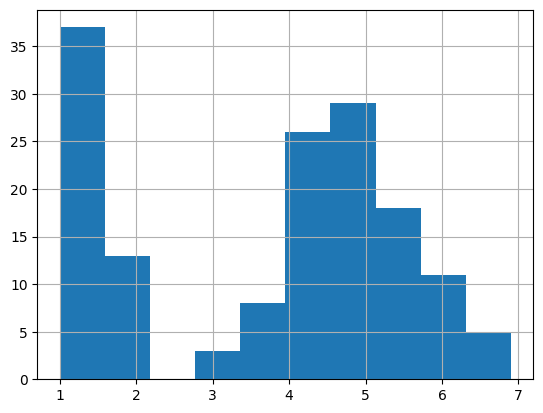

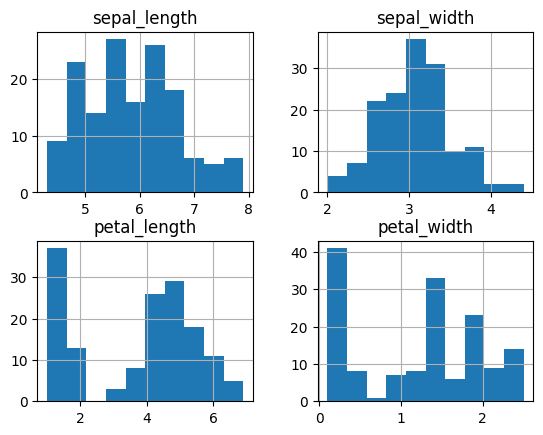

In [218]:
df['petal_length'].hist()

df.hist()

# Not needed while running in Jupyter Notebook
# mp.show()

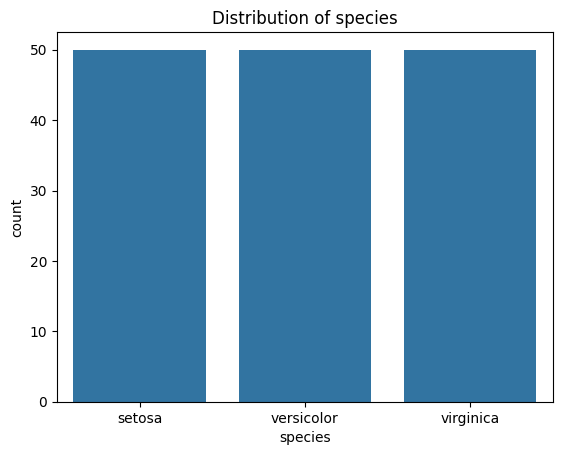

In [219]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    mp.title(f'Distribution of {col}')


### Findings/Observations

It seems that petal length and width is rather small on most samples, while the sepals are consistent across. This could suggest the data was taken in late winter or early spring, before the petals had time to bloom.

## Section 6. Initial Data Transformation and Feature Engineering

In [220]:
df.rename(columns={
    'sepal_length':'Sepal Length',
    'sepal_width':'Sepal Width',
    'petal_length':'Petal Length',
    'petal_width':'Petal Width',
    'species':'Species'
    })

# Petal Area
df['Petal Area'] = df['petal_length'] * df['petal_width']

# Creates a new categorical column Size based on Petal Area
df['Size'] = df['Petal Area'].apply(lambda a : "Large" if a > 5.79 else "Small")

# show first 5 rows
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,Petal Area,Size
0,5.1,3.5,1.4,0.2,setosa,0.28,Small
1,4.9,3.0,1.4,0.2,setosa,0.28,Small
2,4.7,3.2,1.3,0.2,setosa,0.26,Small
3,4.6,3.1,1.5,0.2,setosa,0.30,Small
4,5.0,3.6,1.4,0.2,setosa,0.28,Small
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96,Large
146,6.3,2.5,5.0,1.9,virginica,9.50,Large
147,6.5,3.0,5.2,2.0,virginica,10.40,Large
148,6.2,3.4,5.4,2.3,virginica,12.42,Large


## Section 7. Initial Visualizations

<Axes: >

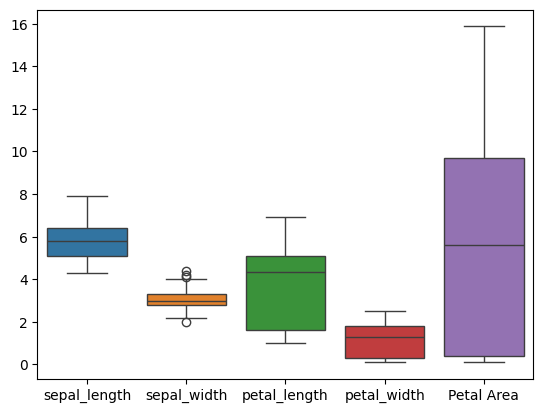

In [221]:
sns.boxplot(df)

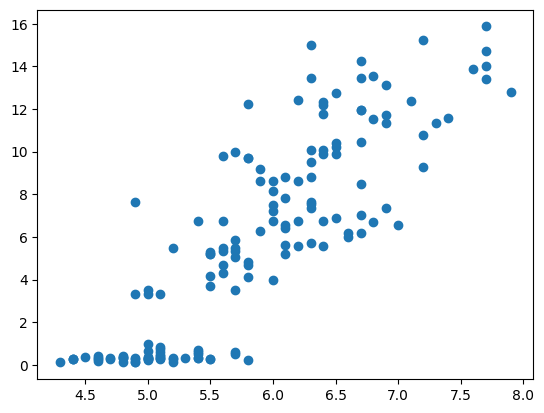

In [222]:
mp.scatter(x=df["sepal_length"], y=df["Petal Area"])

## Section 8. Initial Insights